Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv("C:/Users/Admin/Downloads/archive (7)/parkinsons.data")

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# EDA

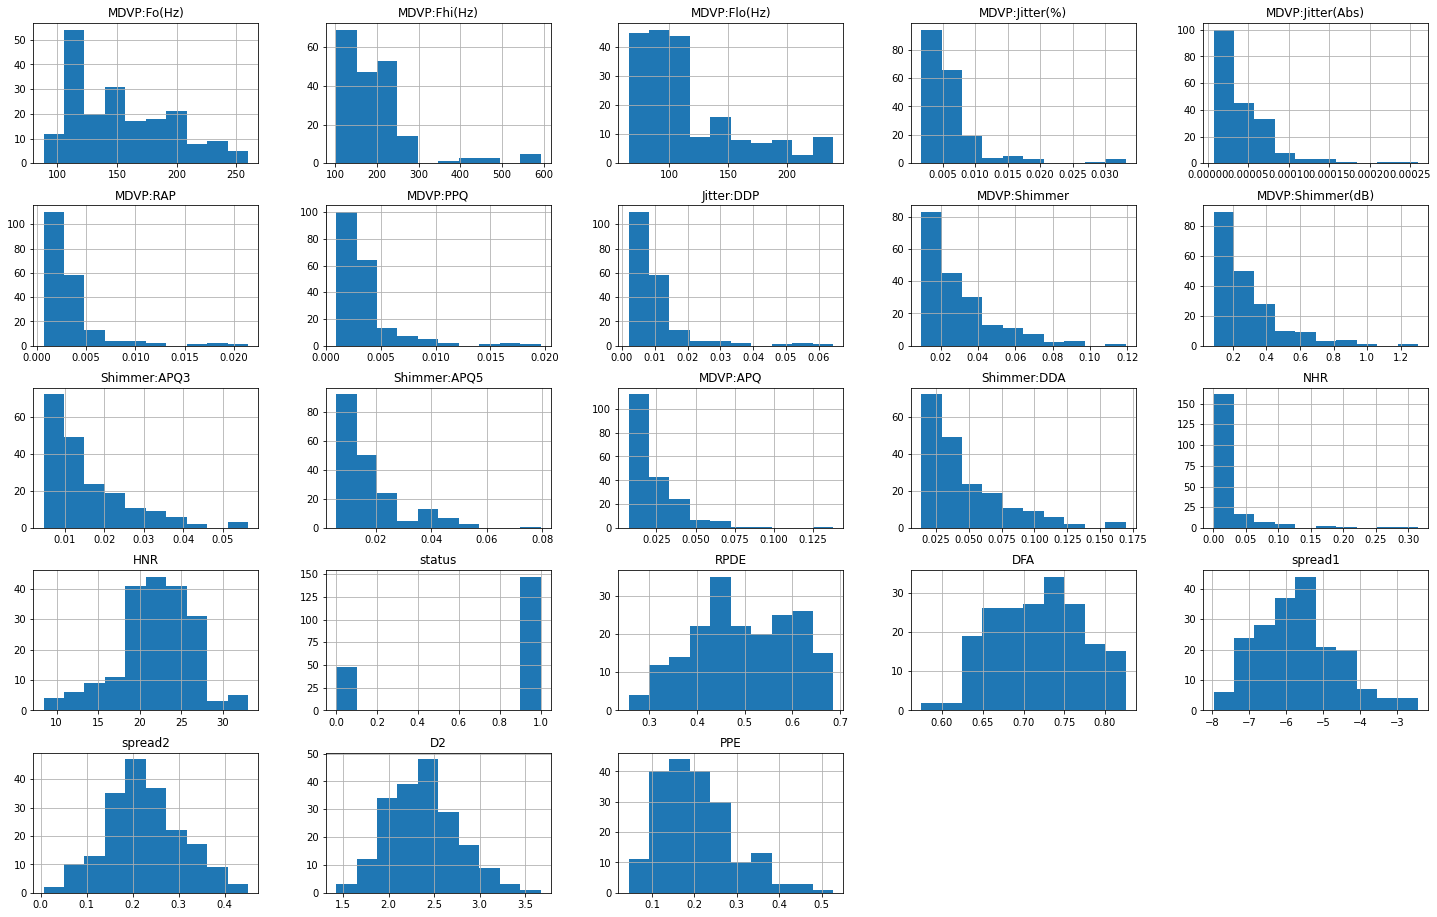

In [10]:
parkinsons_data.hist(figsize=(25,16))
plt.show()

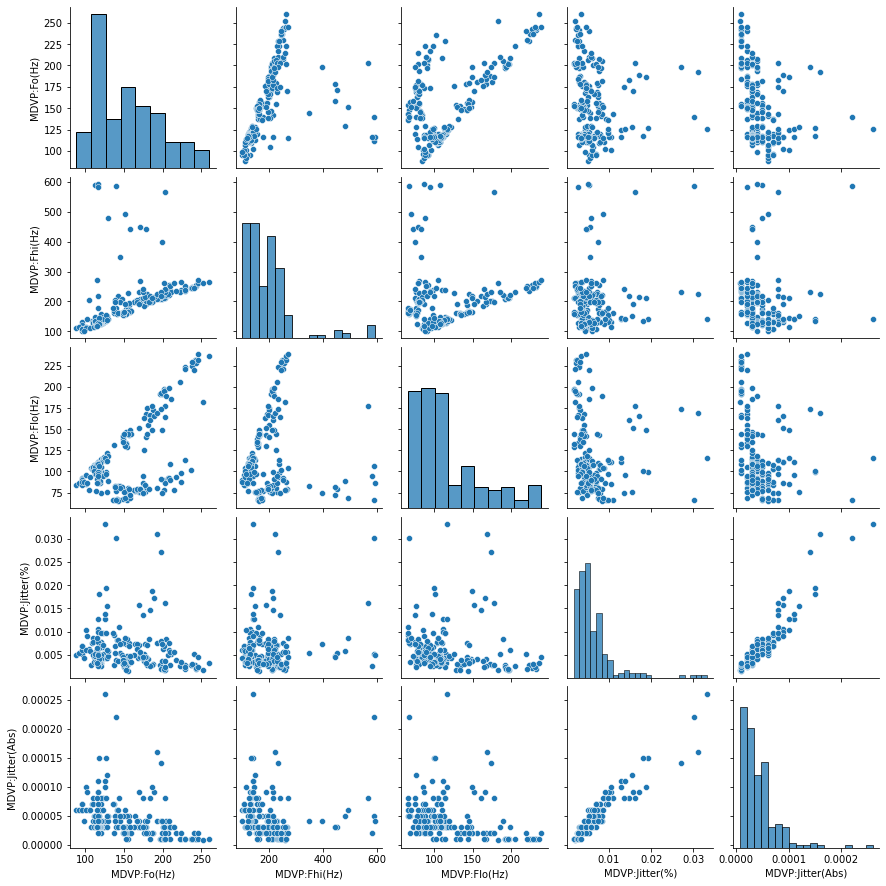

In [11]:
sns.pairplot(parkinsons_data.iloc[: ,0:6])
plt.show()

In [12]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


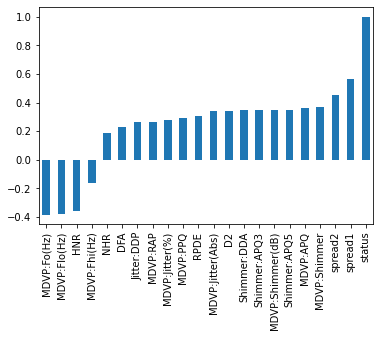

In [13]:
parkinsons_data.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

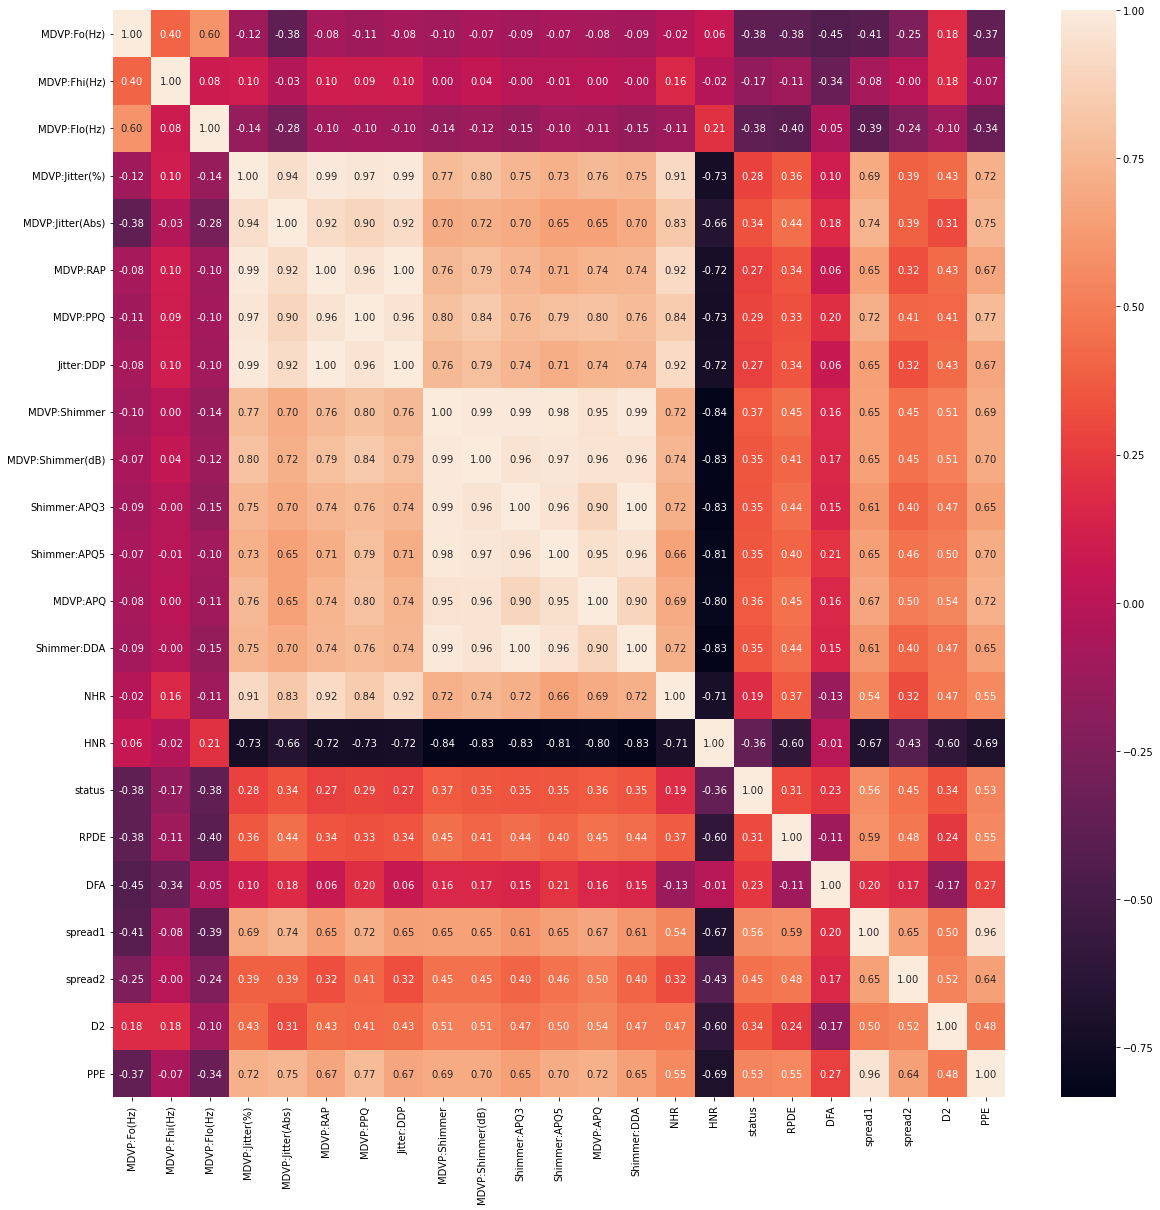

In [14]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(parkinsons_data.corr(), annot = True, fmt= '.2f')
plt.show()

Data Pre-Processing

Separating the features & Target

In [15]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [16]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [17]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [23]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Cross Validation

In [24]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 156, Test set:39
Fold:2, Train set: 156, Test set:39
Fold:3, Train set: 156, Test set:39
Fold:4, Train set: 156, Test set:39
Fold:5, Train set: 156, Test set:39


In [26]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

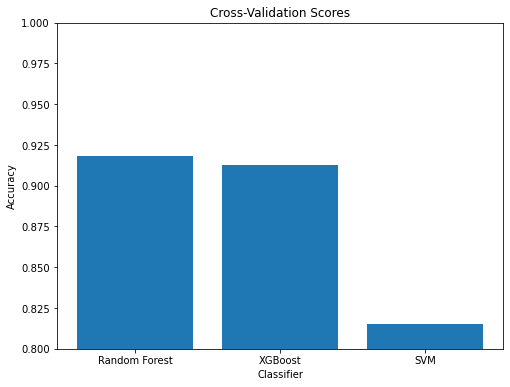

In [27]:
import matplotlib.pyplot as plt

# Define classifiers and scores
classifiers = [    ensemble.RandomForestClassifier(random_state=42),    XGBClassifier(random_state=42),    svm.SVC(kernel='rbf', degree=4, random_state=42)]
classifier_names = ['Random Forest', 'XGBoost', 'SVM']
scores = []

# Compute cross-validation scores for each classifier
for clf in classifiers:
    score = cross_val_score(clf, X, Y, cv=kf, scoring='accuracy')
    scores.append(score.mean())

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(classifier_names, scores)
plt.ylim([0.8, 1.0])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()


In [28]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94871795 0.94871795 0.94871795 0.8974359  0.84615385]
Average score: 0.92


In [29]:

score = cross_val_score(XGBClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94871795 0.94871795 0.92307692 0.87179487 0.87179487]
Average score: 0.91


In [30]:

score = cross_val_score(svm.SVC(kernel='rbf', degree=4, random_state=42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.84615385 0.74358974 0.8974359  0.79487179 0.79487179]
Average score: 0.82


# Support Vector Machine Model

In [31]:
model1 = svm.SVC(C=1.0, kernel='rbf', degree=4, random_state=42) 

In [32]:
model1.fit(X_train, Y_train)

SVC(degree=4, random_state=42)

In [33]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [34]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [35]:
y_pred_train = model1.predict(X_train)

# create confusion matrix
conf_matrix_train = confusion_matrix(Y_train, y_pred_train)

# calculate sensitivity and specificity
TN, FP, FN, TP = conf_matrix_train.ravel()
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

# print results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 1.0
Specificity: 0.675


In [36]:
# accuracy score on training data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [37]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8974358974358975


[[ 4  4]
 [ 0 31]]


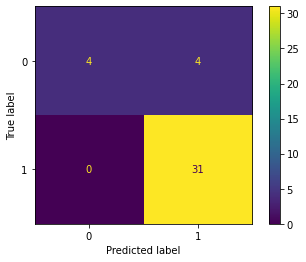

In [38]:
print(confusion_matrix(Y_test, X_test_prediction))
plot_confusion_matrix(model1, X_test, Y_test)
plt.show()

In [39]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



# XG-Boost Model

In [40]:
model2 = XGBClassifier(n_jobs=0,random_state=42,learning_rate=0.300000012)

In [41]:
# training the XGB model with training data
model2.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [43]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [44]:

y_pred_train = model2.predict(X_train)

# create confusion matrix
conf_matrix_train = confusion_matrix(Y_train, y_pred_train)

# calculate sensitivity and specificity
TN, FP, FN, TP = conf_matrix_train.ravel()
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

# print results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 1.0
Specificity: 1.0


In [45]:
# accuracy score on training data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [46]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8205128205128205


[[ 6  2]
 [ 5 26]]


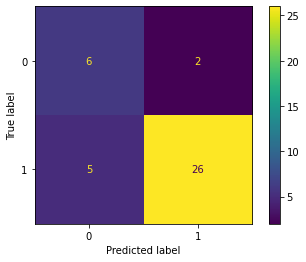

In [47]:
print(confusion_matrix(Y_test, X_test_prediction))
plot_confusion_matrix(model2, X_test, Y_test)
plt.show()

In [48]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



# Random-Forest

In [49]:
model3 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [50]:
# training the RF model with training data
model3.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [51]:
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [52]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9871794871794872


In [53]:

y_pred_train = model3.predict(X_train)

# create confusion matrix
conf_matrix_train = confusion_matrix(Y_train, y_pred_train)

# calculate sensitivity and specificity
TN, FP, FN, TP = conf_matrix_train.ravel()
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

# print results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.9913793103448276
Specificity: 0.975


In [54]:
# accuracy score on training data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [55]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7692307692307693


[[ 6  2]
 [ 7 24]]


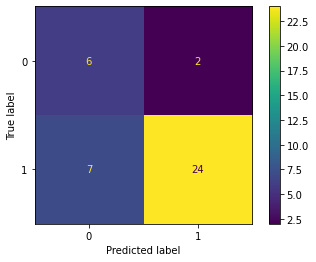

In [56]:
print(confusion_matrix(Y_test, X_test_prediction))
plot_confusion_matrix(model3, X_test, Y_test)
plt.show()

In [57]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39



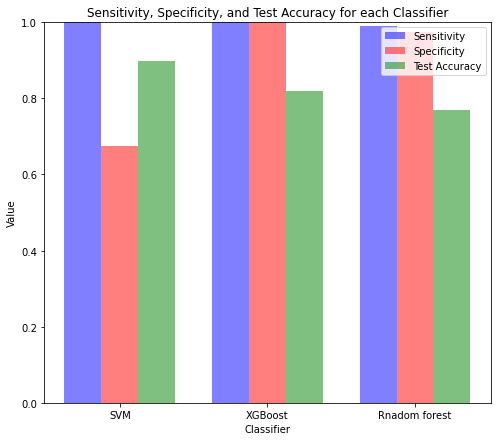

In [58]:
import matplotlib.pyplot as plt

# Define classifiers and their names
classifiers = [model1, model2, model3]
classifier_names = ['SVM', 'XGBoost', 'Rnadom forest']

# Compute sensitivity and specificity for each classifier
sensitivities = []
specificities = []
test_data_accuracies = []
for clf in classifiers:
    y_pred_train = clf.predict(X_train)
    conf_matrix_train = confusion_matrix(Y_train, y_pred_train)
    TN, FP, FN, TP = conf_matrix_train.ravel()
    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)
    
    sensitivities.append(sensitivity)
    
    specificities.append(specificity)
    
    X_test_prediction = clf.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    test_data_accuracies.append(test_data_accuracy)

# Create bar chart
plt.figure(figsize=(8, 7))
bar_width = 0.25
r1 = range(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
plt.bar(r1, sensitivities, color='blue', width=bar_width, alpha=0.5, label='Sensitivity')
plt.bar(r2, specificities, color='red', width=bar_width, alpha=0.5, label='Specificity')
plt.bar(r3, test_data_accuracies, color='green', width=bar_width, alpha=0.5, label='Test Accuracy')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifier_names)
plt.ylim([0.0, 1.0])
plt.xlabel('Classifier')
plt.ylabel('Value')
plt.title('Sensitivity, Specificity, and Test Accuracy for each Classifier')
plt.legend()
plt.show()

Building a Predictive System

In [59]:
input_data =(202.26600,211.60400,197.07900,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.08500,0.00469,0.00606,0.00719,0.01407,0.00072,32.68400,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model3.predict(std_data)
print(prediction)


if (prediction[0] == 0):
    print("The Person does not have Parkinsons Disease")

else:
    print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


In [60]:
input_data = (206.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model3.predict(std_data)
print(prediction)


if (prediction[0] == 0):
    print("The Person does not have Parkinsons Disease")

else:
    print("The Person has Parkinsons")


[1]
The Person has Parkinsons


In [61]:
input_data = (274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,0.375632,0.457832)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model3.predict(std_data)
print(prediction)


if (prediction[0] == 0):
    print("The Person does not have Parkinsons Disease")

else:
    print("The Person has Parkinsons")


[1]
The Person has Parkinsons
